In [154]:
import pandas as pd
from scipy import sparse
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.sparse import coo_matrix, hstack,csr_matrix
import matplotlib.pyplot as plt

# import data

In [16]:
df=pd.read_csv("inclassprob1_training_data.csv")
df.head()

,question_id,user_id,correct
0,13,63994,0
1,13,7633,0
2,13,33056,0
3,13,3714,1
4,13,17535,1


# encode to one-hot design matrix

In [183]:
def zz(in_list,value=1):
    result_dict ={}
    result_array = []
    curr=0
    for i in in_list:
        if i in result_dict:
            result_array.append(result_dict[i])
        else:
            result_dict[i]=curr
            result_array.append( curr )
            curr+=1
    data=value*np.ones(len(in_list))
    row= np.arange(len(in_list),dtype=np.int).reshape(-1)# row index
    col= np.array(result_array,dtype=np.int).reshape(-1) # col index
#     print(data.shape,row.dtype,col.shape )
    mat_coo = sparse.csr_matrix((data, ( row , col )) )
    return mat_coo

In [184]:
x1=zz(df[['user_id']].values.flatten())
x2=zz(df[['question_id']].values.flatten(),value=-1)
X=hstack([x1,x2])
y=df['correct'].values.flatten()

# perform logistic regression to account for our observations

In [185]:
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X,y)

In [192]:
clf.coef_.shape, len(df['user_id'].unique())

((1, 13230), 12839)

In [189]:
X.shape, x1.shape,x2.shape,df[['question_id']].values.flatten().shape

((409519, 13230), (409519, 12839), (409519, 391), (409519,))

# display the distribution of student proficiency and question difficulty

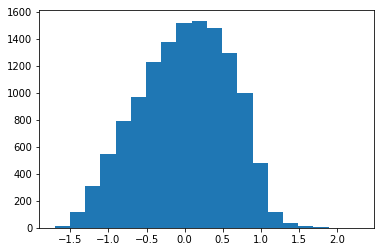

(array([ 2.,  0.,  1.,  5.,  7.,  9.,  9., 19., 19., 31., 22., 39., 32.,
        27., 27., 30., 22., 24., 13., 11., 19.,  5.,  7.,  4.,  3.,  1.,
         0.,  0.,  2.,  1.]),
 array([-1.39531844, -1.29106011, -1.18680179, -1.08254347, -0.97828514,
        -0.87402682, -0.7697685 , -0.66551017, -0.56125185, -0.45699353,
        -0.3527352 , -0.24847688, -0.14421856, -0.03996023,  0.06429809,
         0.16855641,  0.27281474,  0.37707306,  0.48133138,  0.58558971,
         0.68984803,  0.79410635,  0.89836468,  1.002623  ,  1.10688132,
         1.21113965,  1.31539797,  1.41965629,  1.52391462,  1.62817294,
         1.73243126]),
 <a list of 30 Patch objects>)

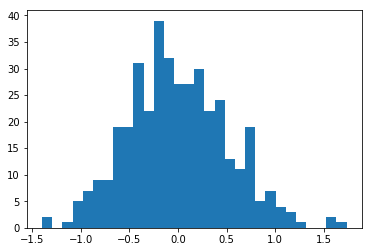

In [188]:
stu=clf.coef_[0][:x1.shape[1]]
qus=clf.coef_[0][x1.shape[1]:]
plt.hist(stu,bins=20)
plt.title('student proficiency')
plt.show()
plt.hist(qus,bins=30)

# remove extremely easy and hard questions

In [198]:
q_index=np.where((qus<-1.1) + (qus >1.1))[0]

In [205]:
def invert_map(in_list,value=1):
    result_dict ={}
    result_array = []
    curr=0
    for i in in_list:
        if i in result_dict:
            result_array.append(result_dict[i])
        else:
            result_dict[i]=curr
            result_array.append( curr )
            curr+=1
#     data=value*np.ones(len(in_list))
#     row= np.arange(len(in_list),dtype=np.int).reshape(-1)# row index
#     col= np.array(result_array,dtype=np.int).reshape(-1) # col index
# #     print(data.shape,row.dtype,col.shape )
#     mat_coo = sparse.csr_matrix((data, ( row , col )) )
    result_dict1 = {v: k for k, v in  result_dict.items()}
    return result_dict1

q_map = invert_map(df[['question_id']].values.flatten())
exclude_qs=[q_map[i] for i in q_index]


[268, 694, 1591, 5566, 12719, 12755, 12949, 15059, 15062, 15412]


In [219]:
print('I will exclude questions whose id={0}, \naccounting for {1:0.2f}% of previously tested questions.'.format(exclude_qs,len(exclude_qs)/len(q_map)*100))

I will exclude questions whose id=[268, 694, 1591, 5566, 12719, 12755, 12949, 15059, 15062, 15412], 
accounting for 2.56% of previously tested questions.
